## Model development

Try different models like LSTM, GRU, Transformers

Importing dependencies

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, GRU, BatchNormalization, Bidirectional
from sklearn.preprocessing import StandardScaler

In [99]:
stock = "microsoft"

In [100]:
df = pd.read_csv("/content/microsoft.csv")
scaler = StandardScaler()

data = df[[ 'Open', 'Close', 'High', 'Low', 'Volume']].values

split = int(0.95*len(data))
train_data = data[:split]
test_data = data[split:]

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

train_data.shape,test_data.shape

((1471, 5), (78, 5))

In [101]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])

    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

X_train.shape, y_train.shape

((1461, 10, 5), (1461,))

In [102]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=1024, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=512, return_sequences=True)),
    Dropout(0.1),
    LSTM(units=256, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=128, return_sequences=False)),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='tanh'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [103]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 10, 1024)            │       4,218,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ (None, 10, 1024)            │       6,295,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 10, 256)             │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,327,425 (47.03 MB)

 Trainable params: 12,327,425 (47.03 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.1296 - val_loss: 0.0210
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0174 - val_loss: 0.0354
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0228 - val_loss: 0.0246
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - val_loss: 0.0175
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0078 - val_loss: 0.0073
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - val_loss: 0.0158
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0066 - val_loss: 0.0590
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0166 - val_loss: 0.0071
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - val_loss: 0.0101
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0063 - val_loss: 0.0126
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0047 - val_loss: 0.0723
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.

In [105]:
predicted_prices = model.predict(X_train)

def inverse_transform(scaled_data, scaler):
    dummy = np.zeros((len(scaled_data), 5))
    dummy[:, 0] = scaled_data.flatten()
    return scaler.inverse_transform(dummy)[:, 0]

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


In [106]:
actual_prices = inverse_transform(y_train, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

actual_prices.shape, predicted_prices.shape

((1461,), (1461,))

In [107]:
test_data.shape

(78, 5)

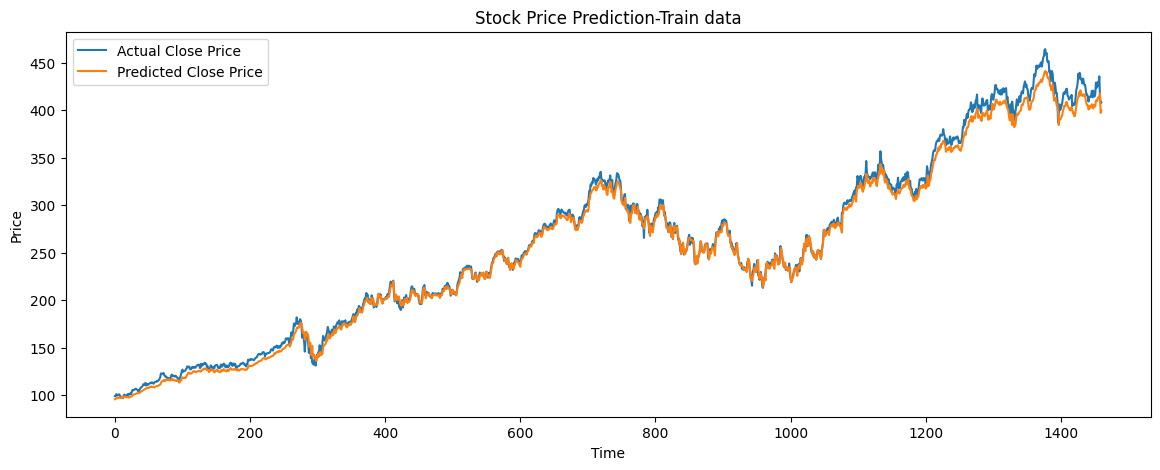

In [108]:
plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


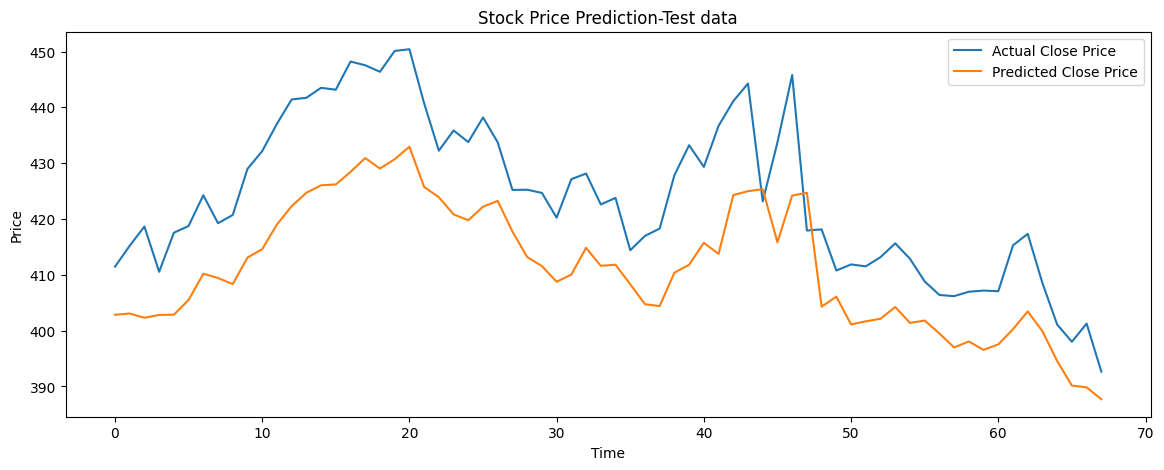

In [109]:
predicted_prices = model.predict(X_test)

actual_prices = inverse_transform(y_test, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Test data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_absolute_percentage_error(actual_prices, predicted_prices)
print(mse)

0.03040849628662053


In [111]:
import joblib

joblib.dump(scaler, f"{stock}_scaler.pkl")

['microsoft_scaler.pkl']

### Insights

The predicted price is not close to the original price and pattern looks more smooth does't learned the complex pattern.